## Setup

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import time


# Simple Neural Network

A traditional neural network without any added modifications like Dropout or Bootstrapping.

## Generate Synthetic Data

In [20]:
# Generates synthetic linear data
def generate_linear_data(n_samples=1000, noise_std=0.1):

    X = np.random.uniform(-5, 5, size=(n_samples, 1))
    y = 2 * X + 1 + np.random.normal(0, noise_std, size=X.shape)

    return X.astype(np.float32), y.astype(np.float32)

# Generates synthetic nonlinear (sine) data
def generate_nonlinear_data(n_samples=1000, noise_std=0.1):

    X = np.random.uniform(-5, 5, size=(n_samples, 1))
    y = np.sin(X) + np.random.normal(0, noise_std, size=X.shape)

    return X.astype(np.float32), y.astype(np.float32)


## Define Simple Neural Network
No dropout or bootstrapping

In [21]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, output_dim=1):
        super(SimpleNN, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.model(x)


## Define Training Function

In [22]:
def train_model(model, X_train, y_train, epochs=1000, lr=0.01):

    # Define the criterion and optimizer for training the model
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model.train()

    # Convert the numpy data into a torch tensor
    X_train_tensor = torch.from_numpy(X_train)
    y_train_tensor = torch.from_numpy(y_train)

    # Iterate through epochs and train the model, keeping track of how long it takes
    start_time = time.time()
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
    training_time = time.time() - start_time

    return training_time


## Define Function for Evaluating Model

In [23]:
def evaluate_model(model, X_test, y_test, alpha=0.05, training_time=0.0):
    model.eval()
    X_test_tensor = torch.from_numpy(X_test)
    with torch.no_grad():
        predictions = model(X_test_tensor).numpy()

    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    residuals = np.abs(predictions - y_test)
    lower = predictions - residuals
    upper = predictions + residuals

    coverage = np.mean((y_test >= lower) & (y_test <= upper))
    interval_width = np.mean(upper - lower)

    accuracy = 1 - (mae / (np.max(y_test) - np.min(y_test)))

    return {
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'Training Time (s)': round(training_time, 3),
        'Coverage': coverage,
        'Interval Width': interval_width,
        'Accuracy': accuracy
    }, predictions, lower, upper


## Define Visualization Function

In [24]:
def plot_predictions_with_interval(X, y_true, y_pred, lower=None, upper=None, title='Model Predictions with Interval'):
    plt.figure(figsize=(10, 6))

    # Sort for nicer line plots
    sorted_idx = np.argsort(X.flatten())
    X_sorted = X[sorted_idx]
    y_true_sorted = y_true[sorted_idx]
    y_pred_sorted = y_pred[sorted_idx]

    # Plot sorted data
    plt.scatter(X, y_true, label='True Data', color='blue', alpha=0.5)
    plt.plot(X_sorted, y_pred_sorted, label='Predicted', color='red')

    # Plot prediction interval
    if lower is not None and upper is not None:
        lower_sorted = lower[sorted_idx]
        upper_sorted = upper[sorted_idx]
        plt.fill_between(
            X_sorted.flatten(), lower_sorted.flatten(), upper_sorted.flatten(),
            color='orange', alpha=0.3, label='Prediction Interval'
        )

    # Plot data
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()


## Run Experiment for Traditional Neural Net (Linear Data)

Model Evaluation Metrics:
MSE: 0.0741
MAE: 0.2090
R2: 0.9969
Training Time (s): 1.2890
Coverage: 1.0000
Interval Width: 0.4179
Accuracy: 0.9854


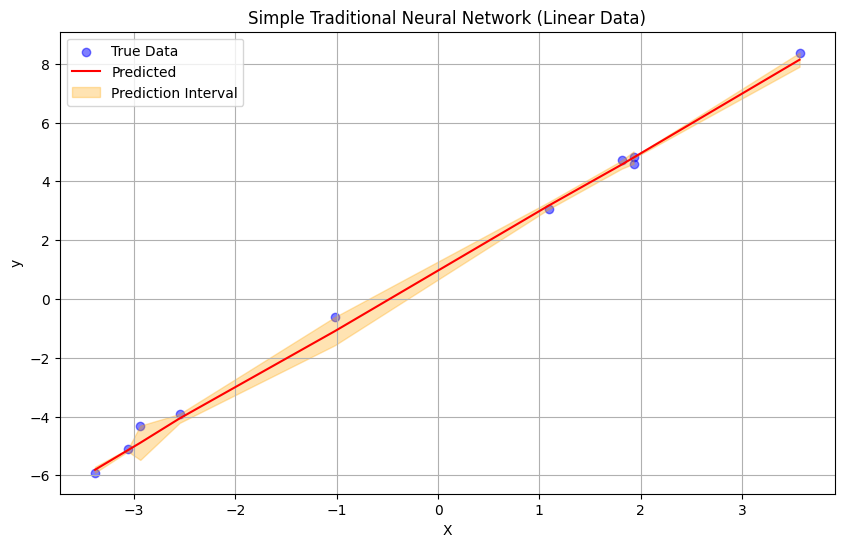

In [25]:
# 1. Generate linear data
X, y = generate_linear_data(n_samples=50, noise_std=0.2)

# 2. Train test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 3. Initialize model
model = SimpleNN()

# 4. Train model
training_time = train_model(model, X_train, y_train)

# 5. Evaluate model
metrics, predictions, lower, upper = evaluate_model(model, X_test, y_test, training_time=training_time)

# 6. Print metrics
print("Model Evaluation Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

# 7. Visualize predictions with interval
plot_predictions_with_interval(X_test, y_test, predictions, lower, upper, title="Simple Traditional Neural Network (Linear Data)")


## Run Experiment for Traditional Neural Net (Nonlinear Data)

Model Evaluation Metrics:
MSE: 0.0432
MAE: 0.1684
R2: 0.9279
Training Time (s): 1.9170
Coverage: 0.9800
Interval Width: 0.3368
Accuracy: 0.9333


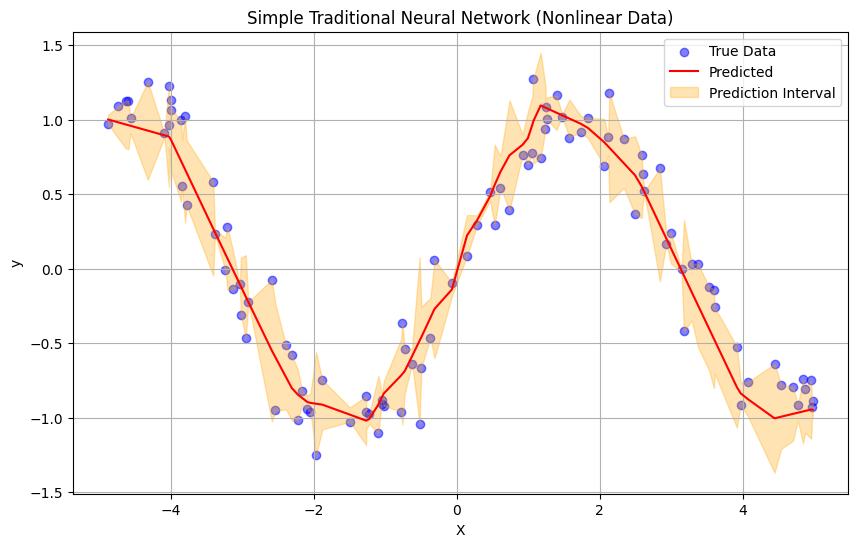

In [56]:
# 1. Generate nonlinear data
X, y = generate_nonlinear_data(n_samples=500, noise_std=0.2)

# 2. Train test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 3. Initialize model
model = SimpleNN()

# 4. Train model
training_time = train_model(model, X_train, y_train)

# 5. Evaluate model
metrics, predictions, lower, upper = evaluate_model(model, X_test, y_test, training_time=training_time)

# 6. Print metrics
print("Model Evaluation Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

# 7. Visualize predictions with interval
plot_predictions_with_interval(X_test, y_test, predictions, lower, upper, title="Simple Traditional Neural Network (Nonlinear Data)")


# Dropout Neural Network

## Define Dropout Neural Network

In [27]:
class DropoutNN(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, output_dim=1, p=0.3):
        super(DropoutNN, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(p),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(p),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.model(x)


## Define Function for Evaluating Model

In [28]:
def evaluate_model_mc_dropout(model, X_test, y_test, training_time, num_samples=50):
    model.eval()

    X_test_tensor = torch.from_numpy(X_test)
    all_preds = []

    with torch.no_grad():
        for _ in range(num_samples):
            preds = model(X_test_tensor).numpy()
            all_preds.append(preds)

    all_preds = np.stack(all_preds)  # [num_samples, batch_size, 1]
    mean_preds = np.mean(all_preds, axis=0)
    std_preds = np.std(all_preds, axis=0)

    # Compute 95% prediction interval
    lower = mean_preds - 1.96 * std_preds
    upper = mean_preds + 1.96 * std_preds

    mse = mean_squared_error(y_test, mean_preds)
    mae = mean_absolute_error(y_test, mean_preds)
    r2 = r2_score(y_test, mean_preds)

    coverage = np.mean((y_test >= lower) & (y_test <= upper))
    interval_width = np.mean(upper - lower)
    accuracy = 1 - (mae / (np.max(y_test) - np.min(y_test)))

    return {
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'Training Time (s)': round(training_time, 3),
        'Coverage': coverage,
        'Interval Width': interval_width,
        'Accuracy': accuracy
    }, mean_preds, lower, upper


## Run Experiment for Dropout Neural Network (Linear Data)

Model Evaluation Metrics:
MSE: 0.1870
MAE: 0.3295
R2: 0.9939
Training Time (s): 2.4280
Coverage: 0.9950
Interval Width: 0.6591
Accuracy: 0.9831


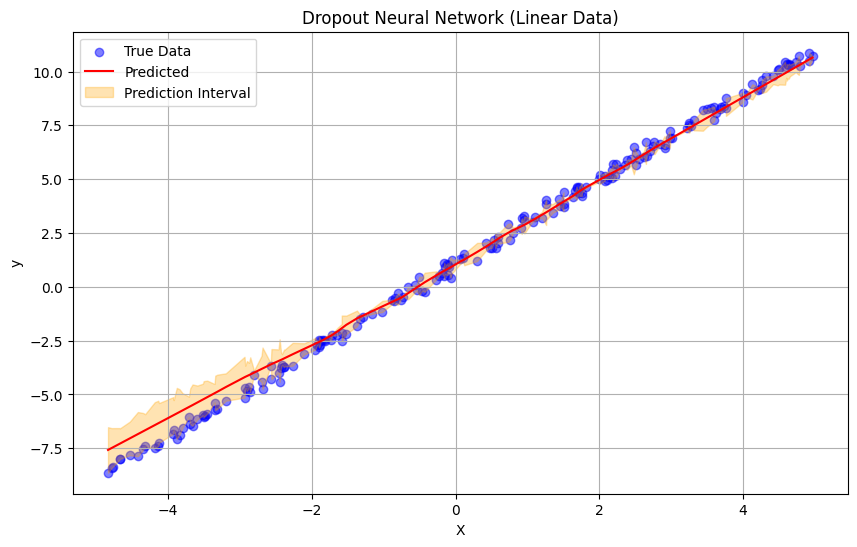

In [29]:
# 1. Generate linear data
X, y = generate_linear_data(n_samples=1000, noise_std=0.2)

# 2. Train test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 3. Initialize model
model = DropoutNN()

# 4. Train model
training_time = train_model(model, X_train, y_train)

# 5. Evaluate model
metrics, predictions, lower, upper = evaluate_model(model, X_test, y_test, training_time=training_time)

# 6. Print metrics
print("Model Evaluation Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

# 7. Visualize predictions with interval
plot_predictions_with_interval(X_test, y_test, predictions, lower, upper, title="Dropout Neural Network (Linear Data)")


## Run Experiment for Dropout Neural Network (Nonlinear Data)

Model Evaluation Metrics:
MSE: 0.0474
MAE: 0.1748
R2: 0.9185
Training Time (s): 8.6130
Coverage: 0.9770
Interval Width: 0.3496
Accuracy: 0.9422


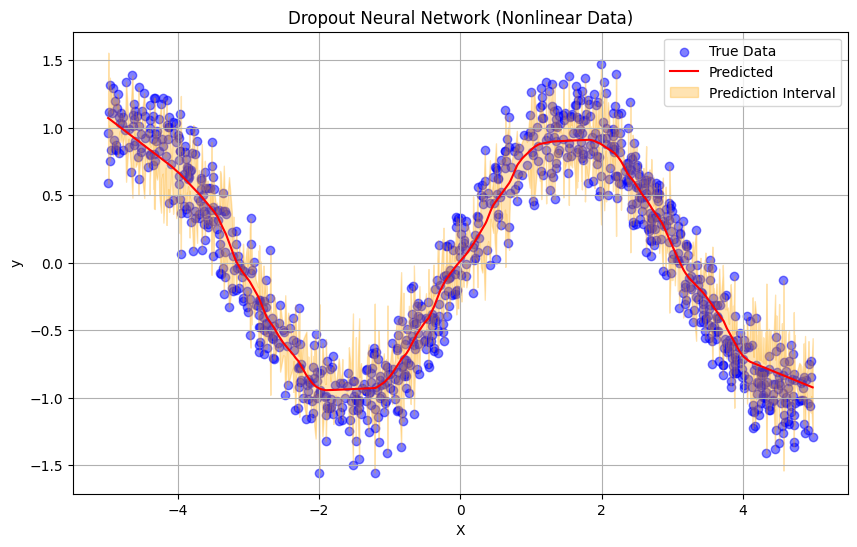

In [73]:
# 1. Generate nonlinear data
X, y = generate_nonlinear_data(n_samples=5000, noise_std=0.2)

# 2. Train test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 3. Initialize model
model = DropoutNN()

# 4. Train model
training_time = train_model(model, X_train, y_train)

# 5. Evaluate model
metrics, predictions, lower, upper = evaluate_model(model, X_test, y_test, training_time=training_time)

# 6. Print metrics
print("Model Evaluation Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

# 7. Visualize predictions with interval
plot_predictions_with_interval(X_test, y_test, predictions, lower, upper, title="Dropout Neural Network (Nonlinear Data)")


# Boostrap Ensemble Neural Network

## Define Boostrap Network
The ensemble is made up of many SimpleNN models

In [31]:
def create_bootstrap_ensemble(n_models=5, model_class=SimpleNN, **kwargs):
    # Creates a list of independetly initialized models
    return [model_class(**kwargs) for _ in range(n_models)]


## Define Training Function

In [32]:
def train_bootstrap_ensemble(ensemble, X_train, y_train, epochs=100, lr=0.01):
    training_times = []

    for model in ensemble:
        # Bootstrap sample
        indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
        X_bootstrap = X_train[indices]
        y_bootstrap = y_train[indices]

        start = time.time()
        train_model(model, X_bootstrap, y_bootstrap, epochs=epochs, lr=lr)
        end = time.time()

        training_times.append(end - start)

    return training_times


## Define Evaluation Function

In [33]:
def evaluate_bootstrap_ensemble(ensemble, X_test, y_test, training_times):
    preds = []

    X_test_tensor = torch.from_numpy(X_test)

    for model in ensemble:
        model.eval()
        with torch.no_grad():
            pred = model(X_test_tensor).numpy()
            preds.append(pred)

    preds = np.stack(preds)  # Shape: [n_models, batch_size, 1]
    mean_preds = np.mean(preds, axis=0)
    std_preds = np.std(preds, axis=0)

    lower = mean_preds - 1.96 * std_preds
    upper = mean_preds + 1.96 * std_preds

    mse = mean_squared_error(y_test, mean_preds)
    mae = mean_absolute_error(y_test, mean_preds)
    r2 = r2_score(y_test, mean_preds)

    coverage = np.mean((y_test >= lower) & (y_test <= upper))
    interval_width = np.mean(upper - lower)
    accuracy = 1 - (mae / (np.max(y_test) - np.min(y_test)))
    total_time = round(sum(training_times), 3)

    return {
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'Training Time (s)': total_time,
        'Coverage': coverage,
        'Interval Width': interval_width,
        'Accuracy': accuracy
    }, mean_preds, lower, upper


## Run Experiment for Bootstrap Neural Network (Linear Data)

Bootstrap Ensemble Evaluation:
MSE: 0.0391
MAE: 0.1602
R2: 0.9988
Training Time (s): 1.8770
Coverage: 0.2100
Interval Width: 0.1200
Accuracy: 0.9919


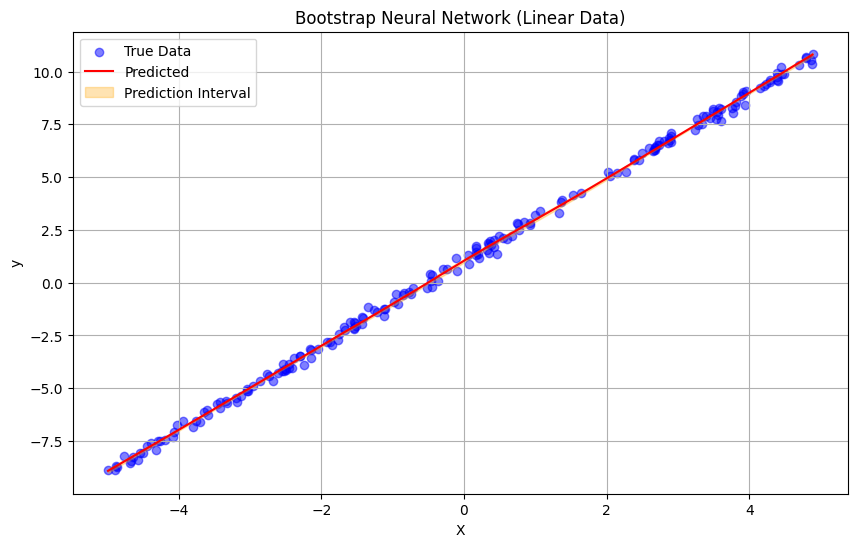

In [34]:
# 1. Generate data
X, y = generate_linear_data(n_samples=1000, noise_std=0.2)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 2. Create ensemble
ensemble = create_bootstrap_ensemble(n_models=10)

# 3. Train
training_times = train_bootstrap_ensemble(ensemble, X_train, y_train)

# 4. Evaluate
metrics, predictions, lower, upper = evaluate_bootstrap_ensemble(ensemble, X_test, y_test, training_times)

print("Bootstrap Ensemble Evaluation:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

# 5. Visualize
plot_predictions_with_interval(X_test, y_test, predictions, lower, upper, title="Bootstrap Neural Network (Linear Data)")


## Run Experiment for Bootstrap Neural Network (Nonlinear Data)

Bootstrap Ensemble Evaluation:
MSE: 0.5070
MAE: 0.5740
R2: 0.4853
Training Time (s): 1.5820
Coverage: 0.2600
Interval Width: 0.4994
Accuracy: 0.8771


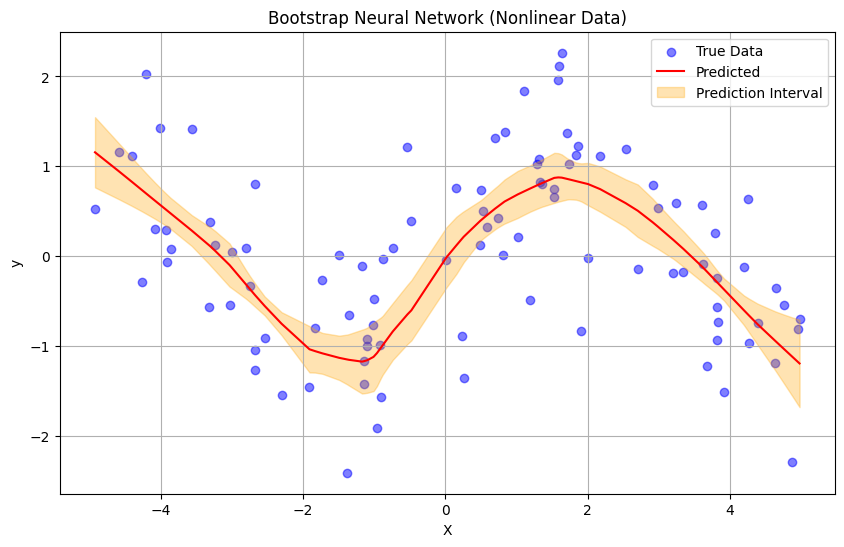

In [77]:
# 1. Generate data
X, y = generate_nonlinear_data(n_samples=500, noise_std=0.8)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 2. Create ensemble
ensemble = create_bootstrap_ensemble(n_models=10)

# 3. Train
training_times = train_bootstrap_ensemble(ensemble, X_train, y_train)

# 4. Evaluate
metrics, predictions, lower, upper = evaluate_bootstrap_ensemble(ensemble, X_test, y_test, training_times)

print("Bootstrap Ensemble Evaluation:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

# 5. Visualize
plot_predictions_with_interval(X_test, y_test, predictions, lower, upper, title="Bootstrap Neural Network (Nonlinear Data)")
